In [1]:
import winsound
# コードの処理
import time
# 完了通知

def ok():
    print("\n処理が完了しました！")
    winsound.Beep(440, 300)
    winsound.Beep(493, 300)
    winsound.Beep(523, 300)

In [33]:
# Chapter という文字列が含まれる行を抽出して別ファイルに保存する
# 抽出結果を書き込んだファイルを確認し、文中にChapterが含まれる行があるか確認する

import os
import re
from tqdm import tqdm

# ディレクトリの指定
source_directory = './texts'
check_directory = './check'

# 旧約を先にする
paths = sorted(os.listdir(source_directory), reverse=True)

for path in paths:
	print(f"\n---- {path} ----\n")
	with open(f'{source_directory}/{path}', mode='r', encoding='utf-8') as f:
		lines = f.readlines()
		with open(f'{check_directory}/{path.replace("bible", "chapters")}', mode='w', encoding='utf-8') as g:
			for line in tqdm(lines):
				if (re.search(r'Chapter', line)): g.write(line)


---- old.bible.txt ----



100%|██████████| 108347/108347 [00:00<00:00, 901207.63it/s]



---- new.bible.txt ----



100%|██████████| 29550/29550 [00:00<00:00, 1150719.38it/s]


In [19]:
# 旧約と新約で形式が少し違うため、形式をそろえる。
# Chapterごとに分類できるように無駄な文字を削除する
#
# ex)
# 1. Matther Chapter 1	 		-> Matther Chapter
# 2. Matther Chapter 2~ 		-> None
# 3. ~:~				   		-> None
# 4. THE BOOK OF ~		 		-> None
# 5. \n					   		-> None

import os
import re
from tqdm import tqdm

import re

# ディレクトリの指定
source_directory = './texts'
target_directory = './clean'

# 旧約を先にする
paths = sorted(os.listdir(source_directory), reverse=True)

pattern12 = re.compile(r'^[0-9]?\s?[A-Za-z]+ Chapter [0-9]+$')
pattern3  = re.compile(r'^[0-9]+:[0-9]+.\s')
pattern45 = re.compile(r'^[THE BOOK OF [A-Z]+|\n')

for path in paths:
	print(f"\n---- {path} ----\n")

	with open(f'{source_directory}/{path}', mode='r', encoding='utf-8') as f:
		lines = f.readlines()

		with open(f'{target_directory}/{path}', mode='w', encoding='utf-8') as g:
			for line in tqdm(lines):
				if (re.match(pattern12, line)):
					match (line.strip().split()[-1]):
						case '1':
							line = re.sub(r'[0-9]+ ', '', line)
							line = re.sub('Chapter 1', 'Chapter', line)
							g.write(line)
						case _:
							continue
				elif (re.match(pattern3, line)): g.write(re.sub(pattern3, '', line))
				elif (re.match(pattern45, line)): continue
				else: g.write(line)


---- old.bible.txt ----



100%|██████████| 108347/108347 [00:00<00:00, 290222.50it/s]



---- new.bible.txt ----



100%|██████████| 29550/29550 [00:00<00:00, 278161.84it/s]


In [ ]:
# クレンジングを行いつつ、章ごとに別々のファイルに抽出する。

import os
import re
from tqdm import tqdm
from shutil import rmtree

def clean_text(text):
	text = text.lower()  # 小文字にする
	text = re.sub(r'[^a-zA-Z\s]', '', text)  # 特殊文字を除く
	text = re.sub(r'\d+', '', text)  # 数字を除く
	text = re.sub(r'\s+', ' ', text).strip()  # 余分なスペースも削除
	return text

# ディレクトリの指定
source_directory = './clean'

# 旧約を先にする
paths = sorted(os.listdir(source_directory), reverse=True)

for path in paths:
	if path.split('.')[-1] != 'txt': continue
	
	print(f"\n---- {path} ----\n")
	if (os.path.exists(f"{source_directory}/{path.split('.')[0]}")):
		rmtree(f"{source_directory}/{path.split('.')[0]}")
		os.mkdir(f"{source_directory}/{path.split('.')[0]}")

	with open(f'{source_directory}/{path}', mode='r', encoding='utf-8') as f:
		lines = f.readlines()

	target_directory = None
	for line in tqdm(lines):
		if (re.search(r'[A-Za-z]+ Chapter$', line)):
			target_directory = f"{source_directory}/{path.split('.')[0]}/{line.split()[0]}.txt"
		elif target_directory is None: continue
		else:
			with open(target_directory, mode='a', encoding='utf-8') as g:
				g.write(clean_text(line)+'\n')


---- old.bible.txt ----



100%|██████████| 68802/68802 [00:12<00:00, 5696.39it/s]



---- new.bible.txt ----



100%|██████████| 18503/18503 [00:03<00:00, 5074.23it/s]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


100%|██████████| 2/2 [00:00<00:00, 23.11it/s]



Vocabulary:
{'kingdomsand': 6, 'zachary': 26, 'tothe': 18, 'justice': 4, 'kinsman': 8, 'sober': 14, 'zelpha': 30, 'youand': 20, 'egyptians': 1, 'timber': 17, 'thatwhich': 15, 'mount': 12, 'zabulonby': 24, 'zebul': 28, 'shaltremember': 13, 'zabad': 21, 'zabadias': 22, 'zethua': 31, 'zacharias': 25, 'zabbai': 23, 'zechri': 29, 'zara': 27, 'mercyremember': 11, 'ye': 19, 'mans': 9, 'disorderlyremember': 0, 'extinctremember': 2, 'therobber': 16, 'kingthou': 7, 'kingand': 5, 'menand': 10, 'jews': 3}
# of vocabulary: 32
--
BoW:
[[0.         0.         0.         0.         0.40824829 0.
  0.40824829 0.         0.40824829 0.         0.         0.
  0.         0.         0.40824829 0.         0.         0.
  0.40824829 0.         0.         0.         0.         0.
  0.         0.         0.40824829 0.         0.         0.
  0.         0.        ]
 [0.09325048 0.55950288 0.09325048 0.09325048 0.         0.09325048
  0.         0.09325048 0.         0.09325048 0.09325048 0.09325048
  0.4662524

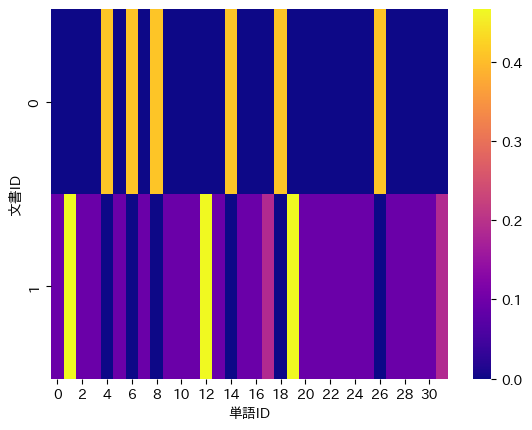


Document 0: Words with TF-IDF score >= 0.2
justice: 0.4082
kingdomsand: 0.4082
kinsman: 0.4082
sober: 0.4082
tothe: 0.4082
zachary: 0.4082

Document 1: Words with TF-IDF score >= 0.2
egyptians: 0.5595
mount: 0.4663
ye: 0.4663

処理が完了しました！


In [13]:
# 旧約、新約それぞれで固有名詞のみを抜き出し、TF-IDFを計算し、ヒートマップを表示する

%matplotlib inline
import sys
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

from tqdm import tqdm

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def english_tokenize(text):
	words = word_tokenize(text)
	tagged_words = pos_tag(words)

	selected_words = [word for word, pos in tagged_words if pos.startswith("NNP")]

	return selected_words

in_path = "./clean/" # 入力ディレクトリ

if __name__ == '__main__':

	# ファイル・ディレクトリの一覧を取得
	in_dir_all = os.listdir(in_path)
	#ファイルのみの一覧を取得
	files = [f for f in in_dir_all if os.path.isfile(os.path.join(in_path, f))]

	texts = []
	print()
	for f in tqdm(files):
		with open(os.path.join(in_path, f), encoding="utf-8") as r:
			s = r.read()
			s = text = re.sub(r'[^a-zA-Z\s]', '', s)
			s = ''.join(s.splitlines()) # 改行削除

		texts.append(s)

	vec = TfidfVectorizer(tokenizer=english_tokenize, token_pattern=None)
	vec.fit(texts)

	print("\nVocabulary:")
	print(vec.vocabulary_)
	print("# of vocabulary: " + str(len(vec.vocabulary_)))

	bow = vec.transform(texts)
	print("--")
	print("BoW:")
	print(bow.toarray())

	bow_pd = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
	print("--")
	print(bow_pd)

	# ヒートマップ表示
	sns.heatmap(bow.toarray(), robust=True, cmap="plasma")
	plt.xlabel("単語ID")
	plt.ylabel("文書ID")
	plt.show()

	threshold = 0.2  # 閾値を設定

	words = []
	for i, row in enumerate(bow.toarray()):
		print(f"\nDocument {i}: Words with TF-IDF score >= {threshold}")
		
		# 閾値以上の単語のインデックスを取得
		valid_indices = row >= threshold  
		top_words = vec.get_feature_names_out()[valid_indices]
		top_scores = row[valid_indices]
		
		# 出力
		for word, score in sorted(zip(top_words, top_scores), key=lambda x: x[1], reverse=True):
			print(f"{word}: {score:.4f}")
		words.append(top_words)

ok()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


100%|██████████| 2/2 [00:00<00:00, 21.82it/s]



Vocabulary:
{'chapterthe': 1471, 'david': 1808, 'esronand': 2431, 'aminadab': 382, 'naassonbegot': 5434, 'uriasand': 9283, 'abia': 18, 'achaz': 111, 'amon': 403, 'amonbegot': 404, 'abiud': 33, 'azor': 998, 'achim': 113, 'eleazar': 2302, 'arefourteen': 763, 'fourteen': 2996, 'holy': 3805, 'joseph': 4508, 'unto': 9134, 'mary': 5133, 'thy': 8617, 'ofthe': 5965, 'child': 1493, 'god': 3206, 'first': 2788, 'born': 1241, 'other': 6104, 'blessed': 1210, 'st': 7545, 'usual': 9354, 'noe': 5662, 'old': 6000, 'right': 6719, 'makethy': 5073, 'only': 6046, 'firstborn': 2789, 'wise': 9780, 'chief': 1491, 'scribes': 6957, 'bythe': 1353, 'juda': 4525, 'thee': 7957, 'thatwho': 7899, 'east': 2228, 'great': 3325, 'sleep': 7362, 'i': 3895, 'angry': 642, 'prophetsayinga': 6508, 'dead': 1836, 'insleep': 4136, 'afraid': 199, 'suchlike': 7671, 'same': 6852, 'wild': 9735, 'many': 5113, 'former': 2909, 'notorious': 5774, 'latter': 4676, 'able': 36, 'upchildren': 9193, 'good': 3285, 'worthy': 9939, 'heshall': 36

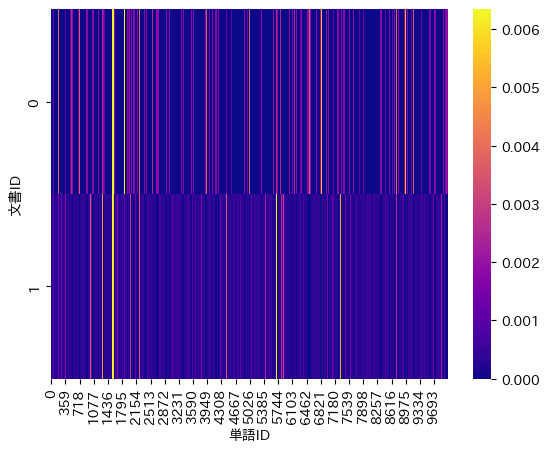


Document 0: Words with TF-IDF score >= 0.1
thy: 0.4314
i: 0.3271
many: 0.3078
great: 0.2833
good: 0.2769
unto: 0.2421
own: 0.2138
thou: 0.1945
same: 0.1726
other: 0.1661
dead: 0.1507
certain: 0.1262
such: 0.1249
first: 0.1198
whole: 0.1159
god: 0.1069

Document 1: Words with TF-IDF score >= 0.1
thy: 0.8669
thou: 0.2173
great: 0.1886
i: 0.1520
good: 0.1184
own: 0.1179
many: 0.1017

処理が完了しました！


In [14]:
# 旧約、新約それぞれで形容詞のみを抜き出し、TF-IDFを計算し、ヒートマップを表示する

%matplotlib inline
import sys
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import re

from tqdm import tqdm

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def english_tokenize(text):
	words = word_tokenize(text)
	tagged_words = pos_tag(words)

	selected_words = [word for word, pos in tagged_words if pos == "JJ"]

	return selected_words

in_path = "./clean/" # 入力ディレクトリ

if __name__ == '__main__':

	# ファイル・ディレクトリの一覧を取得
	in_dir_all = os.listdir(in_path)
	#ファイルのみの一覧を取得
	files = [f for f in in_dir_all if os.path.isfile(os.path.join(in_path, f))]

	texts = []
	print()
	for f in tqdm(files):
		with open(os.path.join(in_path, f), encoding="utf-8") as r:
			s = r.read()
			s = text = re.sub(r'[^a-zA-Z\s]', '', s)
			s = ''.join(s.splitlines()) # 改行削除

		texts.append(s)

	vec = TfidfVectorizer(tokenizer=english_tokenize, token_pattern=None)
	vec.fit(texts)

	print("\nVocabulary:")
	print(vec.vocabulary_)
	print("# of vocabulary: " + str(len(vec.vocabulary_)))

	bow = vec.transform(texts)
	print("--")
	print("BoW:")
	print(bow.toarray())

	bow_pd = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
	print("--")
	print(bow_pd)

	# ヒートマップ表示
	sns.heatmap(bow.toarray(), robust=True, cmap="plasma")
	plt.xlabel("単語ID")
	plt.ylabel("文書ID")
	plt.show()

	threshold = 0.1  # 閾値を設定

	words = []
	for i, row in enumerate(bow.toarray()):
		print(f"\nDocument {i}: Words with TF-IDF score >= {threshold}")
		
		# 閾値以上の単語のインデックスを取得
		valid_indices = row >= threshold  
		top_words = vec.get_feature_names_out()[valid_indices]
		top_scores = row[valid_indices]
		
		# 出力
		for word, score in sorted(zip(top_words, top_scores), key=lambda x: x[1], reverse=True):
			print(f"{word}: {score:.4f}")
		words.append(top_words)

ok()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/2 [00:00<?, ?it/s]


Vocabulary:
{'chapterthe': 1806, 'book': 1380, 'generation': 4096, 'jesus': 5832, 'son': 9699, 'david': 2503, 'theson': 10895, 'abrahamabraham': 47, 'begot': 1158, 'isaac': 5652, 'jacob': 5799, 'judasand': 5956, 'brethrenand': 1447, 'judas': 5955, 'phares': 8198, 'zara': 12805, 'thamar': 10243, 'esronand': 3265, 'aram': 788, 'aminadab': 390, 'naasson': 7231, 'naassonbegot': 7232, 'salmonand': 9031, 'salmon': 9030, 'booz': 1387, 'rahab': 8642, 'obed': 7539, 'ruth': 8933, 'andand': 436, 'jesse': 5830, 'king': 6060, 'wife': 12321, 'uriasand': 11831, 'solomon': 9682, 'roboam': 8882, 'abia': 11, 'begotand': 1159, 'asa': 848, 'joram': 5928, 'ozias': 7944, 'joatham': 5903, 'achaz': 105, 'ezechias': 3435, 'manasses': 6618, 'amon': 395, 'amonbegot': 396, 'josiasand': 5938, 'josias': 5937, 'jechonias': 5817, 'brethren': 1446, 'transmigrationof': 11513, 'babylonand': 1012, 'transmigration': 11512, 'babylon': 1011, 'zorobabel': 12811, 'abiud': 19, 'eliacim': 3143, 'azorand': 1003, 'azor': 1002, '

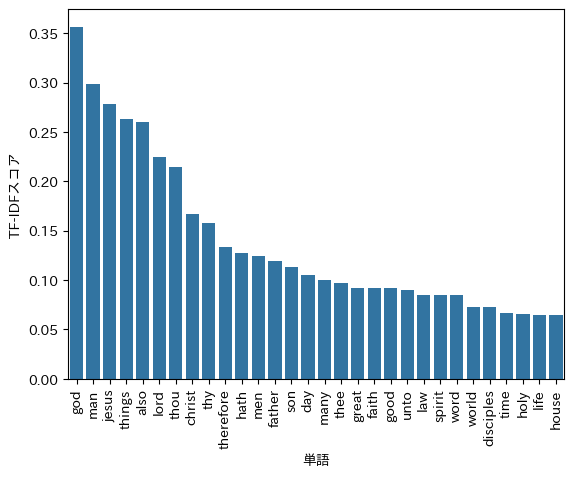

 50%|█████     | 1/2 [00:08<00:08,  8.21s/it]


Vocabulary:
{'genesis': 11209, 'beginning': 3496, 'god': 11446, 'heaven': 12784, 'earth': 8194, 'void': 33430, 'empty': 8629, 'darkness': 6810, 'face': 9392, 'ofthe': 21232, 'deep': 7170, 'spirit': 27203, 'watersand': 33711, 'light': 17357, 'madeand': 18037, 'good': 11709, 'lightfrom': 17368, 'darknessand': 6812, 'day': 6917, 'night': 20306, 'morning': 19319, 'dayand': 6921, 'firmament': 10044, 'waters': 33710, 'watersthe': 33730, 'highest': 13293, 'lower': 17940, 'part': 22068, 'thewaters': 30682, 'cloudsand': 5773, 'underthe': 32662, 'soand': 26748, 'evening': 9010, 'second': 25356, 'daygod': 6937, 'also': 976, 'together': 31836, 'place': 22711, 'dry': 8062, 'land': 16873, 'appear': 2146, 'itwas': 15659, 'doneand': 7836, 'gathering': 11118, 'seas': 25311, 'goodand': 11710, 'forth': 10551, 'green': 11961, 'herb': 13026, 'mayseed': 18521, 'fruit': 10873, 'tree': 32219, 'kind': 16550, 'yieldethseed': 35203, 'seedeach': 25419, 'third': 30950, 'lights': 17379, 'heavento': 12817, 'signs':

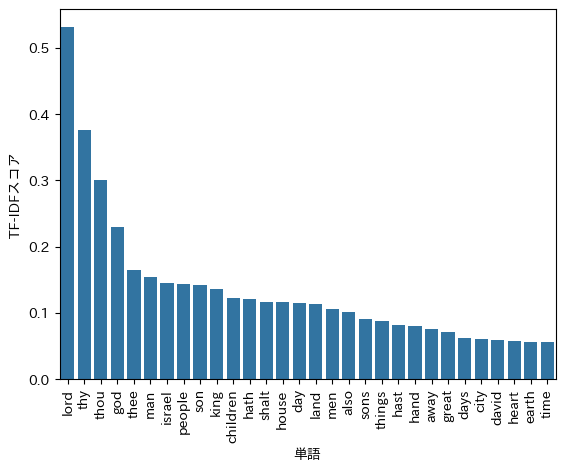

100%|██████████| 2/2 [00:42<00:00, 21.01s/it]


処理が完了しました！


In [21]:
# 旧約、新約それぞれのTF-IDFスコアtop30の単語を抜き出し、棒グラフを表示する

%matplotlib inline
import sys
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import re

from tqdm import tqdm

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

from nltk.corpus import stopwords
nltk.download('stopwords')

def english_tokenize(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)

    # 除外する品詞タグ（POS）
    excluded_tags = {"CC", "CD", "DT", "IN", "MD", "PDT", "PRP", "PRP$", "TO", "UH", "WDT", "WP", "WP$", "WRB", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"}

    # ストップワードを取得
    stop_words = set(stopwords.words("english"))

    # ストップワード・不要タグを除外
    selected_words = [
        word for word, pos in tagged_words
        if pos not in excluded_tags and word.lower() not in stop_words
    ]

    return selected_words


in_path = "./clean/" # 入力ディレクトリ

if __name__ == '__main__':

	# ファイル・ディレクトリの一覧を取得
	in_dir_all = os.listdir(in_path)
	#ファイルのみの一覧を取得
	files = [f for f in in_dir_all if os.path.isfile(os.path.join(in_path, f))]

	print()
	for f in tqdm(files):
		texts = []
		with open(os.path.join(in_path, f), encoding="utf-8") as r:
			s = r.read()
			s = text = re.sub(r'[^a-zA-Z\s]', '', s)
			s = ''.join(s.splitlines()) # 改行削除

		texts.append(s)

		vec = TfidfVectorizer(tokenizer=english_tokenize, token_pattern=None)
		vec.fit(texts)

		print("\nVocabulary:")
		print(vec.vocabulary_)
		print("# of vocabulary: " + str(len(vec.vocabulary_)))

		bow = vec.transform(texts)
		print("--")
		print("BoW:")
		print(bow.toarray())

		bow_pd = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
		print("--")
		print(bow_pd)

		# ヒートマップ表示
		sns.barplot(data=bow_pd.sum(axis=0).sort_values(ascending=False).head(30))
		plt.xlabel("単語")
		plt.xticks(rotation=90)
		plt.ylabel("TF-IDFスコア")
		plt.show()

ok()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


100%|██████████| 2/2 [00:00<00:00, 11.92it/s]



Vocabulary:
{'chapterthe': 6368, 'book': 4920, 'generation': 13523, 'jesus': 19323, 'son': 32310, 'david': 8346, 'theson': 36538, 'abrahamabraham': 188, 'begot': 4202, 'isaac': 18410, 'jacob': 18997, 'judasand': 19718, 'brethrenand': 5181, 'judas': 19716, 'phares': 27164, 'zara': 42586, 'thamar': 34096, 'esronand': 10836, 'aram': 2677, 'aminadab': 1339, 'naasson': 23953, 'naassonbegot': 23954, 'salmonand': 29961, 'salmon': 29959, 'booz': 4937, 'rahab': 28710, 'obed': 24977, 'ruth': 29720, 'andand': 1540, 'jesse': 19313, 'king': 20036, 'wife': 41184, 'uriasand': 39562, 'solomon': 32261, 'roboam': 29537, 'abia': 52, 'begotand': 4203, 'asa': 2957, 'joram': 19566, 'ozias': 26475, 'joatham': 19488, 'achaz': 346, 'ezechias': 11374, 'manasses': 21949, 'amon': 1394, 'amonbegot': 1395, 'josiasand': 19615, 'josias': 19614, 'jechonias': 19135, 'brethren': 5179, 'transmigrationof': 38598, 'babylonand': 3623, 'transmigration': 38597, 'babylon': 3621, 'zorobabel': 42632, 'abiud': 97, 'eliacim': 103

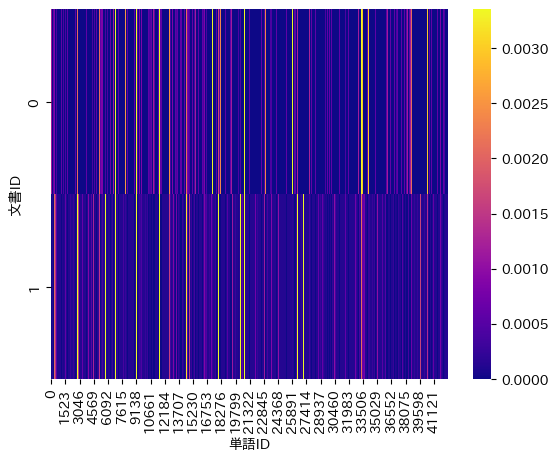


Document 0: Words with TF-IDF score >= 0.1
god: 0.3554
man: 0.2980
jesus: 0.2774
things: 0.2623
also: 0.2590
lord: 0.2242
thou: 0.2142
christ: 0.1664
thy: 0.1576
therefore: 0.1329
hath: 0.1270
men: 0.1245
father: 0.1190
son: 0.1132
day: 0.1044
many: 0.1002

Document 1: Words with TF-IDF score >= 0.1
lord: 0.5301
thy: 0.3749
thou: 0.2995
god: 0.2287
thee: 0.1641
man: 0.1540
israel: 0.1445
people: 0.1427
son: 0.1416
king: 0.1364
children: 0.1227
hath: 0.1202
shalt: 0.1168
house: 0.1158
day: 0.1153
land: 0.1133
men: 0.1060
also: 0.1017

処理が完了しました！


In [23]:
# 旧約、新約それぞれで形容詞のみを抜き出し、TF-IDFを計算し、ヒートマップを表示する

%matplotlib inline
import sys
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import re

from tqdm import tqdm

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def english_tokenize(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)

    # 除外する品詞タグ（POS）
    excluded_tags = {"CC", "CD", "DT", "IN", "MD", "PDT", "PRP", "PRP$", "TO", "UH", "WDT", "WP", "WP$", "WRB", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"}

    # ストップワードを取得
    stop_words = set(stopwords.words("english"))

    # ストップワード・不要タグを除外
    selected_words = [
        word for word, pos in tagged_words
        if pos not in excluded_tags and word.lower() not in stop_words
    ]

    return selected_words

in_path = "./clean/" # 入力ディレクトリ

if __name__ == '__main__':

	# ファイル・ディレクトリの一覧を取得
	in_dir_all = os.listdir(in_path)
	#ファイルのみの一覧を取得
	files = [f for f in in_dir_all if os.path.isfile(os.path.join(in_path, f))]

	texts = []
	print()
	for f in tqdm(files):
		with open(os.path.join(in_path, f), encoding="utf-8") as r:
			s = r.read()
			s = text = re.sub(r'[^a-zA-Z\s]', '', s)
			s = ''.join(s.splitlines()) # 改行削除

		texts.append(s)

	vec = TfidfVectorizer(tokenizer=english_tokenize, token_pattern=None)
	vec.fit(texts)

	print("\nVocabulary:")
	print(vec.vocabulary_)
	print("# of vocabulary: " + str(len(vec.vocabulary_)))

	bow = vec.transform(texts)
	print("--")
	print("BoW:")
	print(bow.toarray())

	bow_pd = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
	print("--")
	print(bow_pd)

	# ヒートマップ表示
	sns.heatmap(bow.toarray(), robust=True, cmap="plasma")
	plt.xlabel("単語ID")
	plt.ylabel("文書ID")
	plt.show()

	threshold = 0.1  # 閾値を設定

	words = []
	for i, row in enumerate(bow.toarray()):
		print(f"\nDocument {i}: Words with TF-IDF score >= {threshold}")
		
		# 閾値以上の単語のインデックスを取得
		valid_indices = row >= threshold  
		top_words = vec.get_feature_names_out()[valid_indices]
		top_scores = row[valid_indices]
		
		# 出力
		for word, score in sorted(zip(top_words, top_scores), key=lambda x: x[1], reverse=True):
			print(f"{word}: {score:.4f}")
		words.append(top_words)

ok()

In [ ]:
# テキストデータを訓練用と本番用に分けたのち、
# BoW, svmを用いて本番用データ内の各章は旧約か新約かどちらに分類されるのかを予測する

%matplotlib inline

import sys
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # k近傍法（k-nearest neighbor）識別器
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def english_tokenize(text):
	words = word_tokenize(text)
	tagged_words = pos_tag(words)

	selected_words = [word for word, pos in tagged_words if pos.startswith("NN")]

	return selected_words

in_path = "./clean/" # 入力ディレクトリ

if __name__ == '__main__':

	# ファイル・ディレクトリの一覧を取得
	in_here_all = os.listdir(in_path)
	
	# ディレクトリのみの一覧を取得
	dirs = [d for d in in_here_all if os.path.isdir(os.path.join(in_path, d))]

	lines = [] # わかち書きテキスト
	filenames = [] # ファイル名
	labels = [] # ラベル
	
	for dir in dirs:
		print(f"\n -- {dir} --\n")

		# ファイル・ディレクトリの一覧を取得
		in_dir_all = os.listdir(os.path.join(in_path, dir))

		# ファイルのみの一覧を取得
		files = [f for f in in_dir_all if os.path.isfile(os.path.join(f"{in_path}/{dir}", f))]

		for file in tqdm(files):
			# ラベルの作成
			# newではじまる文書はラベル(0)
			# それ意外の文書はラベル(1)
			label = 0 if dir.startswith('new') else 1

			with open(os.path.join(f"{in_path}/{dir}", file), encoding="utf-8") as r:
				s = r.readlines()
			lines.extend(s) # 行単位でリストに追加
			labels.extend([label] * len(s)) # 上記追加した行数の数だけlabelsを追加
			filenames.extend([file] * len(s))

	# BOWの生成
	print("\n--")
	print("Making BoW:")
	vec = CountVectorizer(tokenizer=english_tokenize, min_df=2, token_pattern=None)	
	vec.fit(lines)
	bow = vec.transform(lines)
	bow_array = bow.toarray()

	accurancy_list = {}

	# データセット（bow_array, labels）を学習用と評価用に分割
	# data_train: 学習用データ
	# data_test: 評価用データ
	# label_train: 学習用データの教師ラベル
	# label_test: 評価用データの教師ラベル
	# filename_train: 学習用データのファイル名
	# filename_test: 評価用データのファイル名
	print("\n--")
	print("Training and Evaluation:")
	for way in range(2):
		print("\n--")
		match way:
			case 0:
				print("Linear SVM")
			case 1:
				print("k-NN")
			
		data_train, data_test, label_train, label_test, filename_train, filename_test = train_test_split(bow_array, labels, filenames, shuffle=True, test_size=0.5, random_state=0)

		match way:
			case 0:
				classifier = svm.LinearSVC() # 線形SVM
			case 1:
				classifier = KNeighborsClassifier() # k-NN

		# モデルの学習
		classifier.fit(data_train, label_train)

		# 学習したモデルを用いた識別
		result = classifier.predict(data_test)

		print("--")
		# 交差検証
		cv_setting = KFold(n_splits=10, random_state=0, shuffle=True)
		scores = cross_val_score(classifier, bow_array, labels, cv=cv_setting)

		plt.plot(range(1, 11), scores, 'b-.', label='Cross Validation')
		plt.axvline(np.mean(scores), 1, 10, linestyle='--', color='red', label='Average')
		plt.xlabel('Number of splits')
		plt.ylabel('Accuracy')
		plt.legend()
		plt.grid()
		plt.show()

ok()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



 -- new --



100%|██████████| 20/20 [00:00<00:00, 107.73it/s]



 -- old --



100%|██████████| 39/39 [00:00<00:00, 116.82it/s]



--
Making BoW:

--
Training and Evaluation:

--
Linear SVM
--
Cross Validation scores: [0.84433746 0.84592457 0.83400206 0.84133899 0.8297604  0.83835836
 0.84042187 0.83675341 0.84913447 0.83514846]
Average score: 0.8395180059903715

--
k-NN


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\twil3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



 -- new --



100%|██████████| 20/20 [00:00<00:00, 1402.40it/s]



 -- old --



100%|██████████| 39/39 [00:00<00:00, 956.76it/s]



--
Making TF-IDF:

--
Training and Evaluation:

--
Linear SVM
--


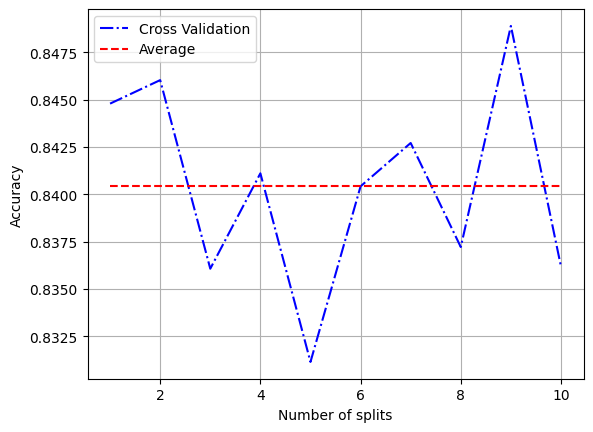


--
k-NN
--


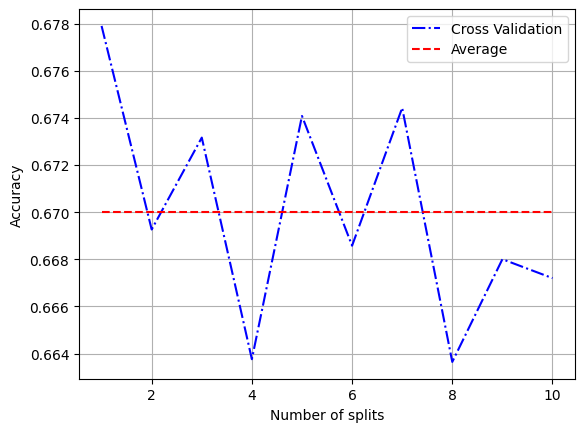


処理が完了しました！


In [3]:
# テキストデータを訓練用と本番用に分けたのち、
# Tf-Idf, svmを用いて本番用データ内の各章は旧約か新約かどちらに分類されるのかを予測する

%matplotlib inline
import sys
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # k近傍法（k-nearest neighbor）識別器
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def english_tokenize(text):
	words = word_tokenize(text)
	tagged_words = pos_tag(words)

	selected_words = [word for word, pos in tagged_words if pos.startswith("NN")]

	return selected_words

in_path = "./clean/" # 入力ディレクトリ

if __name__ == '__main__':

	# ファイル・ディレクトリの一覧を取得
	in_here_all = os.listdir(in_path)
	
	# ディレクトリのみの一覧を取得
	dirs = [d for d in in_here_all if os.path.isdir(os.path.join(in_path, d))]

	lines = [] # わかち書きテキスト
	filenames = [] # ファイル名
	labels = [] # ラベル
	
	for dir in dirs:
		print(f"\n -- {dir} --\n")

		# ファイル・ディレクトリの一覧を取得
		in_dir_all = os.listdir(os.path.join(in_path, dir))

		# ファイルのみの一覧を取得
		files = [f for f in in_dir_all if os.path.isfile(os.path.join(f"{in_path}/{dir}", f))]

		for file in tqdm(files):
			# ラベルの作成
			# newではじまる文書はラベル(0)
			# それ意外の文書はラベル(1)
			label = 0 if dir.startswith('new') else 1

			with open(os.path.join(f"{in_path}/{dir}", file), encoding="utf-8") as r:
				s = r.readlines()
			lines.extend(s) # 行単位でリストに追加
			labels.extend([label] * len(s)) # 上記追加した行数の数だけlabelsを追加
			filenames.extend([file] * len(s))

	# Tf-Idfの生成
	print("\n--")
	print("Making TF-IDF:")
	vec = TfidfVectorizer(tokenizer=english_tokenize, min_df=2, token_pattern=None)	
	vec.fit(lines)
	bow = vec.transform(lines)
	bow_array = bow.toarray()

	# データセット（bow_array, labels）を学習用と評価用に分割
	# data_train: 学習用データ
	# data_test: 評価用データ
	# label_train: 学習用データの教師ラベル
	# label_test: 評価用データの教師ラベル
	# filename_train: 学習用データのファイル名
	# filename_test: 評価用データのファイル名
	print("\n--")
	print("Training and Evaluation:")
	for way in range(2):
		print("\n--")
		match way:
			case 0:
				print("Linear SVM")
			case 1:
				print("k-NN")
			
		data_train, data_test, label_train, label_test, filename_train, filename_test = train_test_split(bow_array, labels, filenames, shuffle=True, test_size=0.5, random_state=0)

		match way:
			case 0:
				classifier = svm.LinearSVC() # 線形SVM
			case 1:
				classifier = KNeighborsClassifier() # k-NN

		# モデルの学習
		classifier.fit(data_train, label_train)

		# 学習したモデルを用いた識別
		result = classifier.predict(data_test)

		print("--")
		# 交差検証
		cv_setting = KFold(n_splits=10, random_state=0, shuffle=True)
		scores = cross_val_score(classifier, bow_array, labels, cv=cv_setting)

		plt.plot(range(1, 11), scores, 'b-.', label='Cross Validation')
		plt.hlines(np.mean(scores), xmin=1, xmax=10, linestyle='--', color='red', label='Average')
		plt.xlabel('Number of splits')
		plt.ylabel('Accuracy')
		plt.legend()
		plt.grid()
		plt.show()

ok()

In [2]:
ok()


処理が完了しました！
